In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
from keras.models import load_model
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
import numpy as np
import keras.applications
from keras.preprocessing import image
from keras.preprocessing import image
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
# Initialising the CNN
classifier = Sequential()


In [3]:
#Adding 1st convolutional layer
# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (90, 90, 3), use_bias= False))
classifier.add(BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None))
classifier.add(Activation('relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(90, 90, 3..., use_bias=False)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)`
  after removing the cwd from sys.path.


In [4]:
#adding a second convolutional and pooling layer for increased accuracy
classifier.add(Convolution2D(32, 3, 3 , use_bias=False))
classifier.add(BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), use_bias=False)`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
#adding a third convolutional and pooling layer for increased accuracy
classifier.add(Convolution2D(64, 5, 5, use_bias=False))
classifier.add(BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), use_bias=False)`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
#adding a fourth convolutional and pooling layer for increased accuracy
classifier.add(Convolution2D(128, 3, 3, use_bias=False))
classifier.add(BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), use_bias=False)`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#Step 3 -flattening
classifier.add(Flatten())

In [8]:
#Step 4- full connection

classifier.add(Dense(output_dim=128, use_bias=False)) #creates the hidden layer i.e the fully connected layer
classifier.add(BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None))
classifier.add(Activation("relu"))
classifier.add(Dropout(0.2))

classifier.add(Dense(output_dim= 4)) # creates the output layer
classifier.add(BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None))
classifier.add(Activation("softmax"))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(use_bias=False, units=128)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)`
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=4)`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)`
  if __name__ == '__main__':


In [9]:
#compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 88, 88, 32)        864       
_________________________________________________________________
batch_normalization_1 (Batch (None, 88, 88, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 88, 88, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 32)        9216      
_________________________________________________________________
batch_normalization_2 (Batch (None, 42, 42, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 42, 42, 32)        0         
__________

In [10]:
#PART 2--- FITTING OUR CNN TO OUR IMAGES

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train_set',
                                                 target_size = (90, 90),
                                                 batch_size = 18,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (90, 90),
                                            batch_size = 18,
                                            class_mode = 'categorical')


Found 16209 images belonging to 4 classes.
Found 3965 images belonging to 4 classes.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=900, epochs=18, validation_steps=3965)`
  app.launch_new_instance()


Epoch 1/18
900/900 [==============================] - 2590s 3s/step - loss: 0.6934 - acc: 0.7696 - val_loss: 0.5172 - val_acc: 0.8281
Epoch 2/18
900/900 [==============================] - 7494s 8s/step - loss: 0.5016 - acc: 0.8253 - val_loss: 0.5371 - val_acc: 0.8212
Epoch 3/18
900/900 [==============================] - 2558s 3s/step - loss: 0.4561 - acc: 0.8368 - val_loss: 0.5388 - val_acc: 0.8138
Epoch 4/18
900/900 [==============================] - 2600s 3s/step - loss: 0.4271 - acc: 0.8435 - val_loss: 0.6181 - val_acc: 0.7416
Epoch 5/18
900/900 [==============================] - 49093s 55s/step - loss: 0.4206 - acc: 0.8451 - val_loss: 0.5362 - val_acc: 0.8133
Epoch 6/18
900/900 [==============================] - 2619s 3s/step - loss: 0.4014 - acc: 0.8498 - val_loss: 0.5483 - val_acc: 0.7503
Epoch 7/18
900/900 [==============================] - 2737s 3s/step - loss: 0.3798 - acc: 0.8596 - val_loss: 0.4531 - val_acc: 0.8270
Epoch 8/18
900/900 [==============================] - 2632s 

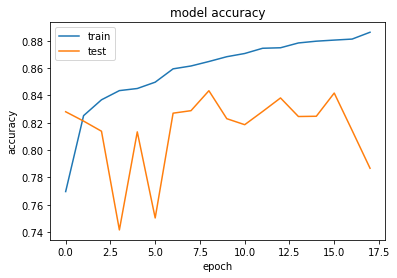

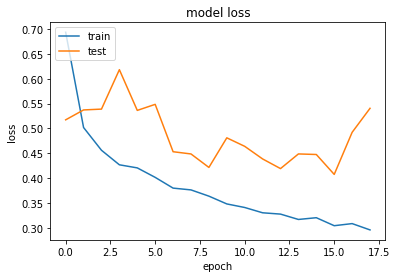

In [11]:
#checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_lists = [checkpoint]
#classifier.load_weights(filename)
classifier.save("best1.hdf5")





history=classifier.fit_generator(training_set,
                         samples_per_epoch = 16209,
                         nb_epoch = 18,
                         validation_data = test_set,
                         nb_val_samples = 3965)
#save the weights 
classifier.save_weights('malariarmszeropttwodropout7andBN.h5')


# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



